In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in each month csv

jan = pd.read_csv('Resources/202001-citibike-tripdata.csv')
feb = pd.read_csv('Resources/202002-citibike-tripdata.csv')
mar = pd.read_csv('Resources/202003-citibike-tripdata.csv')
apr = pd.read_csv('Resources/202004-citibike-tripdata.csv')
may = pd.read_csv('Resources/202005-citibike-tripdata.csv')
jun = pd.read_csv('Resources/202006-citibike-tripdata.csv')

In [3]:
#For each month, append the next month, then drop all null values from the resulting data frame

jf = jan.append(feb)

jf.dropna()

jfm = jf.append(mar)

jfm.dropna()

jfma = jfm.append(apr)

jfma.dropna()

jfmam = jfma.append(may)

jfmam.dropna()

full_dataset = jfmam.append(jun)

full_dataset.dropna()

full_dataset.columns = ['tripduration', 'starttime', 'stoptime', 'start_stationid', 'start_stationname', 'start_stationlat', 'start_stationlon', 
             'end_stationid', 'end_stationname', 'end_stationlat', 'end_stationlon', 'bikeid', 'usertype', 'birthyear', 'gender']

In [4]:
full_dataset.head()

,tripduration,starttime,stoptime,start_stationid,start_stationname,start_stationlat,start_stationlon,end_stationid,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,birthyear,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [5]:
#Split the start and stop time columns in two, then place the date values into a new column
datetime = full_dataset["starttime"].str.split(" ", n = 1, expand = True) 

full_dataset['startdate'] = datetime[0]

enddatetime = full_dataset["stoptime"].str.split(" ", n = 1, expand = True) 

full_dataset['stopdate'] = enddatetime[0]

In [6]:
full_dataset.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_stationid',
       'start_stationname', 'start_stationlat', 'start_stationlon',
       'end_stationid', 'end_stationname', 'end_stationlat', 'end_stationlon',
       'bikeid', 'usertype', 'birthyear', 'gender', 'startdate', 'stopdate'],
      dtype='object')

In [7]:
#Get age by substrction birth year from 2020
full_dataset['age'] = 2020 - full_dataset['birthyear']
full_dataset.head()

,tripduration,starttime,stoptime,start_stationid,start_stationname,start_stationlat,start_stationlon,end_stationid,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,birthyear,gender,startdate,stopdate,age
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,2020-01-01,2020-01-01,28
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,2020-01-01,2020-01-01,51
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,2020-01-01,2020-01-01,57
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,2020-01-01,2020-01-01,40
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,2020-01-01,2020-01-01,38


In [8]:
#Get time in minutes by dividing time in seconds by 60
full_dataset['duration(min)'] = round(full_dataset['tripduration']/60, 2)

# full_dataset.head()

In [9]:
del full_dataset['tripduration']
del full_dataset['starttime']
del full_dataset['stoptime']
del full_dataset['start_stationid']
del full_dataset['end_stationid']
del full_dataset['birthyear']

full_dataset

,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,gender,startdate,stopdate,age,duration(min)
0,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1,2020-01-01,2020-01-01,28,13.15
1,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1,2020-01-01,2020-01-01,51,25.68
2,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1,2020-01-01,2020-01-01,57,24.40
3,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1,2020-01-01,2020-01-01,40,9.87
4,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1,2020-01-01,2020-01-01,38,11.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,2,2020-06-30,2020-07-01,27,11.42
1882269,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,0,2020-06-30,2020-07-01,51,7.43
1882270,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,1,2020-06-30,2020-07-01,34,7.32
1882271,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,1,2020-06-30,2020-07-01,26,14.83


In [10]:
clean_df = full_dataset[['duration(min)', 'startdate', 'stopdate', 'start_stationname', 'start_stationlat', 
             'start_stationlon', 'end_stationname', 'end_stationlat', 'end_stationlon', 
             'bikeid', 'usertype', 'age', 'gender' ]]

clean_df

,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,11.42,2020-06-30,2020-07-01,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,27,2
1882269,7.43,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,51,0
1882270,7.32,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,34,1
1882271,14.83,2020-06-30,2020-07-01,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,26,1


In [11]:
#Drop any row with age greater than 100
clean_dataframe = clean_df.loc[clean_df['age'] < 100, :]

clean_dataframe

,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,11.42,2020-06-30,2020-07-01,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,27,2
1882269,7.43,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,51,0
1882270,7.32,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,34,1
1882271,14.83,2020-06-30,2020-07-01,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,26,1


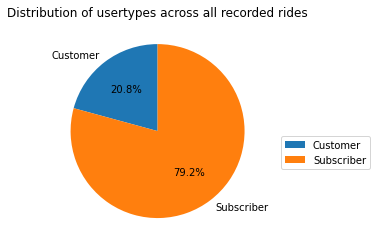

In [12]:
user_type = pd.DataFrame(full_dataset.groupby('usertype')["usertype"].count())
user_type_pie = user_type.plot.pie(y = 'usertype', startangle = 90,autopct="%1.1f%%")
plt.axis('off')
plt.legend (loc = 'upper right', bbox_to_anchor = (1.5,0.5))
plt.title("Distribution of usertypes across all recorded rides")
plt.show()

In [13]:
# user_type_bar = pd.DataFrame(full_dataset.groupby('usertype')['bikeid'].count())
# user_type_bar_chart = user_type_bar.plot.bar()
# user_type_bar_chart.set_xlabel("Usertype")
# user_type_bar_chart.set_ylabel("Count of ")
# plt.show()

In [14]:
# full_dataset.to_csv('for_julie.csv',index=False)

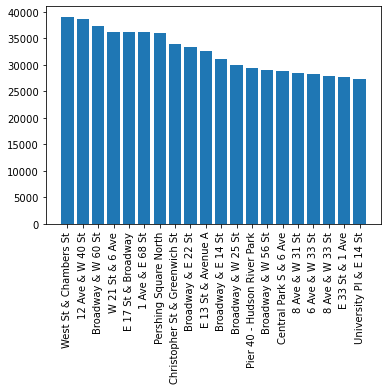

In [15]:
station_start_count = pd.DataFrame(clean_dataframe["start_stationname"].value_counts()).reset_index().rename(columns = {"index": "Start Station"})
station_start_count = station_start_count.head(20)

plt.bar(station_start_count["Start Station"],station_start_count["start_stationname"])
plt.xticks(rotation=90)
plt.show()

In [16]:
clean_dataframe.head()

,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1


In [17]:
# station_start_count = pd.DataFrame(clean_dataframe["start_stationname"].value_counts()).reset_index().rename(columns = {"index": "Start Station"})
# locations = airport_df[["start_stationlat", "start_stationlon"]]

# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)

In [18]:
clean_dataframe.dtypes

duration(min)        float64
startdate             object
stopdate              object
start_stationname     object
start_stationlat     float64
start_stationlon     float64
end_stationname       object
end_stationlat       float64
end_stationlon       float64
bikeid                 int64
usertype              object
age                    int64
gender                 int64
dtype: object

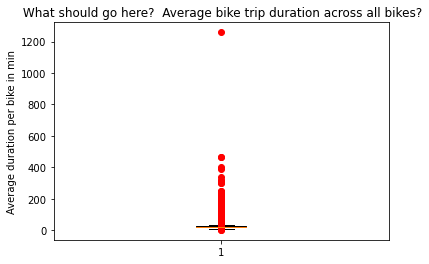

duration(min)    1259.53
dtype: float64
duration(min)    1.03
dtype: float64


In [21]:
# box plot for average trip duration per bike
duration_avg__bike_grouped = clean_dataframe.groupby('bikeid')['duration(min)'].mean()
# make dataframe
dur_avg_bike = pd.DataFrame(duration_avg__bike_grouped)

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
quartiles = dur_avg_bike['duration(min)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upperb = round(upperq + (1.5*iqr),2)
lowerb = round(lowerq - (1.5*iqr),2)
plt.boxplot(dur_avg_bike, sym = 'r')
plt.ylabel("Average duration per bike in min")
plt.title(f" What should go here?  Average bike trip duration across all bikes?")
plt.show()

## determine outliers using upper and lower bounds
# bike_dur_outliers = dur_avg.loc[(dur_avg["duration(min)"]<lowerq) | (dur_avg["duration(min)"]>upperq)]
# display(bike_dur_outliers)

# find max and min duration bike id
max_bike_dur = dur_avg_bike.max()
print(max_bike_dur)
min_bike_dur = dur_avg_bike.min()
print(min_bike_dur)

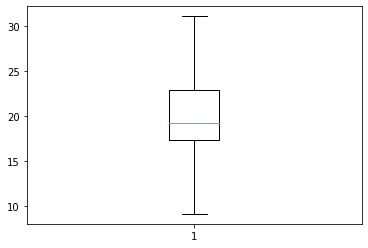

duration(min)    1259.53
dtype: float64
duration(min)    1.03
dtype: float64


In [27]:
# box plot for average trip duration per bike without outliers
plt.boxplot(dur_avg_bike, sym = 'r',showfliers = False)
# showfliers = removes data points outside upper and lower bounds
# plt.ylabel("Average duration per bike in min")
# plt.title(f" What should go here?  Average bike trip duration across all bikes?")
plt.show()

## determine outliers using upper and lower bounds
# bike_dur_outliers = dur_avg.loc[(dur_avg["duration(min)"]<lowerq) | (dur_avg["duration(min)"]>upperq)]
# display(bike_dur_outliers)

# find max and min duration bike id
max_bike_dur = dur_avg_bike.max()
print(max_bike_dur)
min_bike_dur = dur_avg_bike.min()
print(min_bike_dur)

In [22]:
dur_avg.sort_values(by =['duration(min)'], ascending = False)

NameError: name 'dur_avg' is not defined

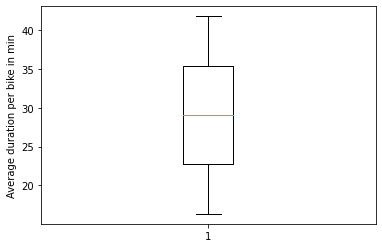

duration(min)    41.839394
dtype: float64
duration(min)    16.311966
dtype: float64


In [23]:
# box plot for average trip duration per usertype
duration_avg__usertype_grouped = clean_dataframe.groupby('usertype')['duration(min)'].mean()
# make dataframe
dur_avg_usertype = pd.DataFrame(duration_avg__usertype_grouped)

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
quartiles = dur_avg_usertype['duration(min)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upperb = round(upperq + (1.5*iqr),2)
lowerb = round(lowerq - (1.5*iqr),2)
plt.boxplot(dur_avg_usertype, sym = 'r')
plt.ylabel("Average duration per bike in min")
plt.show()

## determine outliers using upper and lower bounds
# bike_dur_outliers = dur_avg.loc[(dur_avg["duration(min)"]<lowerq) | (dur_avg["duration(min)"]>upperq)]
# display(bike_dur_outliers)

# find max and min duration bike id
max_usertype_dur = dur_avg_usertype.max()
print(max_usertype_dur)
min_usertype_dur = dur_avg_usertype.min()
print(min_usertype_dur)

In [24]:
clean_dataframe.columns

Index(['duration(min)', 'startdate', 'stopdate', 'start_stationname',
       'start_stationlat', 'start_stationlon', 'end_stationname',
       'end_stationlat', 'end_stationlon', 'bikeid', 'usertype', 'age',
       'gender'],
      dtype='object')

In [30]:
bikes_by_trip_count = clean_dataframe.groupby(['bikeid']).count()
print(bikes_by_trip_count)

        duration(min)  startdate  stopdate  start_stationname  \
bikeid                                                          
14529              34         34        34                 34   
14530             352        352       352                352   
14531             103        103       103                103   
14533             269        269       269                269   
14534             371        371       371                371   
...               ...        ...       ...                ...   
44537              59         59        59                 59   
44538              53         53        53                 53   
44539              44         44        44                 44   
44541              33         33        33                 33   
44542              49         49        49                 49   

        start_stationlat  start_stationlon  end_stationname  end_stationlat  \
bikeid                                                                     

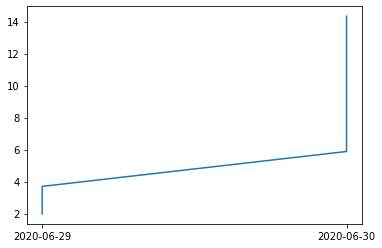

In [26]:
# Generate a line plot of the bike with the max average trip duration
# two parameter (x and y)

# Get specific data frame for a mouse
bikeID_37963 = clean_dataframe.loc[(clean_dataframe["bikeid"] == 44501)]
bikeID_37963
xaxis = bikeID_37963['startdate']
yaxis = bikeID_37963['duration(min)']
plt.plot(xaxis, yaxis)
# cap_title = (f"Tumor growth for mouse {Mouse ID} ")
# plt.title(f"Tumor growth for mouse {mouse_id[0]} on {reg_id[0]} regimen")
# plt.xlabel("Timepoint")
# plt.ylabel("Tumor size")
plt.show()